<a href="https://colab.research.google.com/github/Whereamiactually/lyceumcompling11/blob/main/Text_recognition_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyOCR

Это новый механизм OCR с открытым исходным кодом, он активно развивается и обеспечивает быстрые и точные результаты за счет работы на GPU. **Но EasyOCR не поддерживает вывод в формате PDF**, что затрудняет реконструкцию входных документов.
Но он очень полезен для вывода больших объемов необработанного текста (хотя **Tesseract** справляется с этим намного быстрее, но менее качественно), а также для обработки изображений реального мира, например, фотографий вывесок (Tesseract может работать только с заранее подготовленным черно-белым текстом, который не повернут).

**EasyOCR** может посоревноваться с **FineReader**, а иногда и превосходить его, однако, в разбиении текста на параграфы, как **FineReader**, так и **Tesseract** всё ещё лучше.

**EasyOCR** тоже поддерживает довольно много [языков](https://www.jaided.ai/easyocr/), в том числе и русский.

**EasyOCR** поддерживает одновременную загрузку нескольких языковых моделей для выполнения многоязычного OCR.

In [ ]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 10.0 MB/s eta 0:00:00


In [ ]:
import easyocr
from google.colab.patches import cv2_imshow
from google.colab import files
import cv2

In [ ]:
reader = easyocr.Reader(['en']) # создаём представителя класса и загружаем модели распознавания

Saving Billboard_eng_3.jpg to Billboard_eng_3.jpg
Billboard_eng_3.jpg


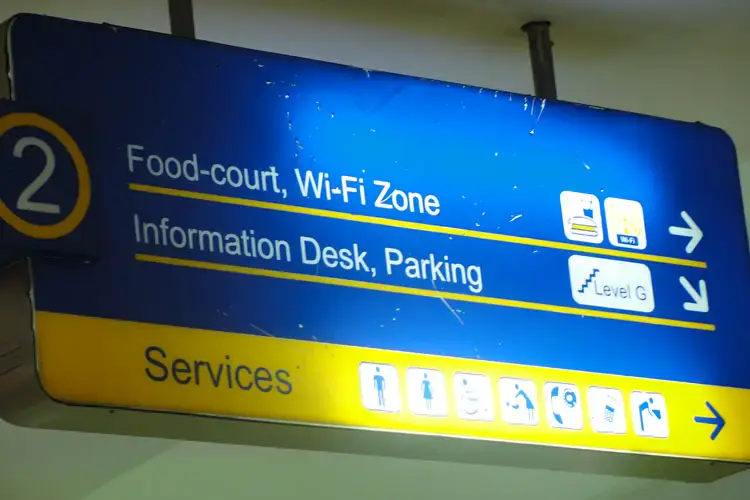

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(filename)
img = cv2.imread(filename)
cv2_imshow(img)

**allowlist** – ограничивает модель и задаёт ей определённые символы, которые нужно распознать.

**blocklist** – задаёт символы, которые мы не хотим, чтобы модель распознавала.

**detail** – если 1 (по дефолту), тогда выдаёт координаты рамок слов и распознанный текст, если 0, то выдаёт только распознанный текст.

**paragraph** – если False (по дефолту), тексты возвращаются в отдельных списках, если True, тексты комбинируются в абзацы.

Посмотрим на распознанный текст с загруженной картинки. Пока мы не будем просить комбинировать текст в абзацы. Также мы не будем просить выводить координаты слов.

In [ ]:
result = reader.readtext(img, detail = 0)
result

['2',
 'Food-court,"',
 'Wi-Fi',
 'Zone',
 'Information',
 'Desk,',
 'Parking',
 '{evl6',
 'Services']

Теперь попробуем попросить комбинировать рядом расположенный текст в абзацы.

In [ ]:
result = reader.readtext(img, detail = 0, paragraph = True)
result

['2 Food-court," Wi-Fi Zone Information Desk, Parking', '{evl6', 'Services']

Теперь выведем координаты слов и вероятность распознать их правильно.

In [ ]:
result = reader.readtext(img, detail = 1, paragraph = False)
result

[([[10, 134], [66, 134], [66, 218], [10, 218]], '2', 0.9999997615814351),
 ([[125.35289989173408, 136.05268933957785],
   [300.99684000885776, 166.84103477237497],
   [291.64710010826593, 204.94731066042215],
   [117.00315999114224, 174.15896522762503]],
  'Food-court,"',
  0.326742669473161),
 ([[293.07351789077586, 161.10877514125852],
   [374.8313051408846, 172.8506084577346],
   [367.92648210922414, 210.89122485874148],
   [287.1686948591154, 199.1493915422654]],
  'Wi-Fi',
  0.999534839897666),
 ([[372.16756942214056, 172.08757628406065],
   [451.91471116477953, 190.17839395307095],
   [441.83243057785944, 226.91242371593935],
   [363.08528883522047, 208.82160604692905]],
  'Zone',
  0.999625563621521),
 ([[130.3088020879675, 206.06017190141475],
   [301.99184491017684, 232.7447075929538],
   [293.6911979120325, 270.9398280985853],
   [122.00815508982318, 244.2552924070462]],
  'Information',
  0.9976781246610652),
 ([[299.03792769639495, 225.09343125161422],
   [390.8882415564721

Нарисуем границы слов!

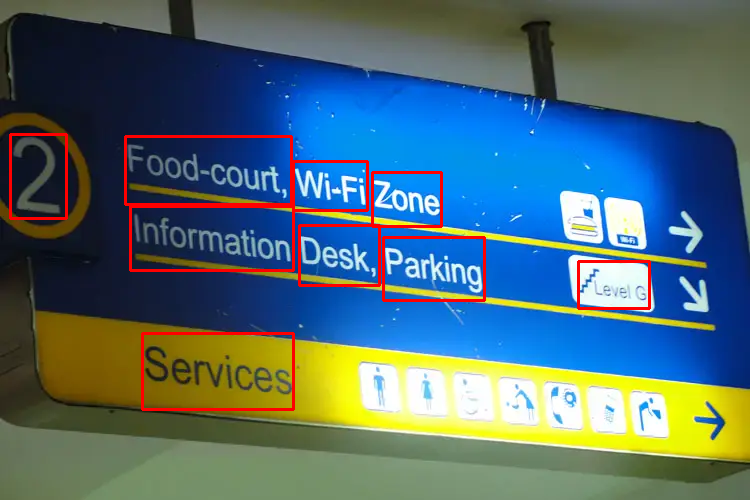

In [ ]:
for (coord, text, prob) in result:

  (topleft, topright, bottomright, bottomleft) = coord
  tx, ty = (int(topleft[0]), int(topleft[1]))
  bx, by = (int(bottomright[0]), int(bottomright[1]))
  cv2.rectangle(img, (tx, ty), (bx, by), (0, 0, 255), 2)

cv2_imshow(img)

Потрясающе, я считаю.

Попробуем более сложную картинку!

Saving Billboard_eng.jpg to Billboard_eng (1).jpg
Billboard_eng (1).jpg


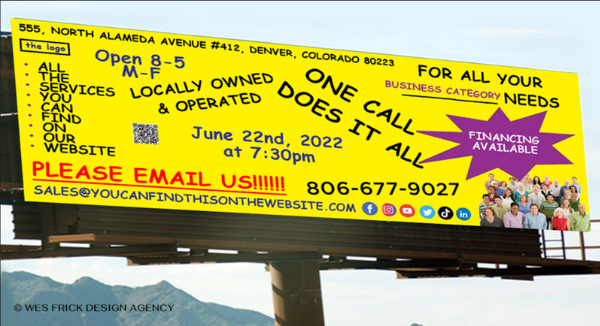

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(filename)
img = cv2.imread(filename)
cv2_imshow(img)

In [ ]:
result = reader.readtext(img, detail = 0)
result

['555',
 'NORTH',
 'ALAMEDA AVENUE',
 '#412 _',
 'DENVER',
 'Oper-?-5',
 'COLORADO',
 'ALL',
 'RVICES',
 'LOCALLY',
 'BUSINESS CATEGORY',
 'OPERATED',
 'NEEDS',
 'QHBSITE',
 'June 22nd,',
 '2022',
 'Fae',
 'at',
 'ALL',
 'PLEASE EMAIL_USIIII',
 '806-677-9027',
 'SALES@YOUCANFINDTHISONTHEWEBSIBC',
 'coM',
 'WES FRICK DESIGN AGENCY',
 '80223',
 '#He',
 'FoR',
 'ONE',
 'OWNED',
 'YOUR',
 'DOES',
 'CALL',
 'It',
 '7.3opm']

In [ ]:
result = reader.readtext(img, detail = 0, paragraph = True)
result

['555 NORTH ALAMEDA AVENUE #412 _ DENVER Oper-?-5 COLORADO #He 80223 OWNED FoR ONE BUSINESS CATEGORY ALL YOUR RVICES LOCALLY OPERATED DOES NEEDS CALL June 22nd, It QHBSITE 2022 at Fae 7.3opm ALL PLEASE EMAIL_USIIII SALES@YOUCANFINDTHISONTHEWEBSIBC 806-677-9027 coM',
 'WES FRICK DESIGN AGENCY']

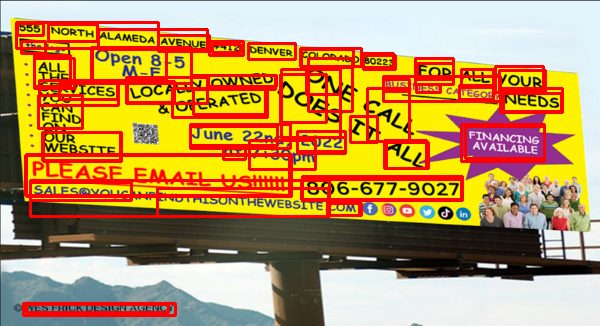

In [ ]:
result = reader.readtext(img, detail = 1, paragraph = False)
for (coord, text, prob) in result:

  (topleft, topright, bottomright, bottomleft) = coord
  tx, ty = (int(topleft[0]), int(topleft[1]))
  bx, by = (int(bottomright[0]), int(bottomright[1]))
  cv2.rectangle(img, (tx, ty), (bx, by), (0, 0, 255), 2)

cv2_imshow(img)

Saving text_90_eng_1.jpg to text_90_eng_1.jpg
text_90_eng_1.jpg


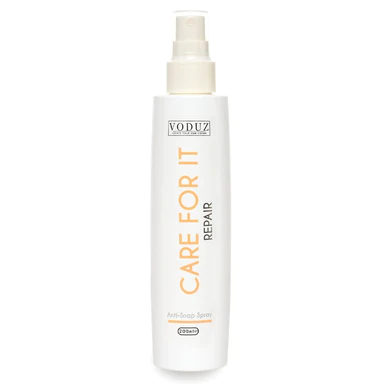

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(filename)
img = cv2.imread(filename)
cv2_imshow(img)

In [ ]:
result = reader.readtext(img, detail = 0, paragraph = True)
result

["';[,?", '1 81 8']

Saving Receipt_eng.jpg to Receipt_eng (1).jpg
Receipt_eng (1).jpg


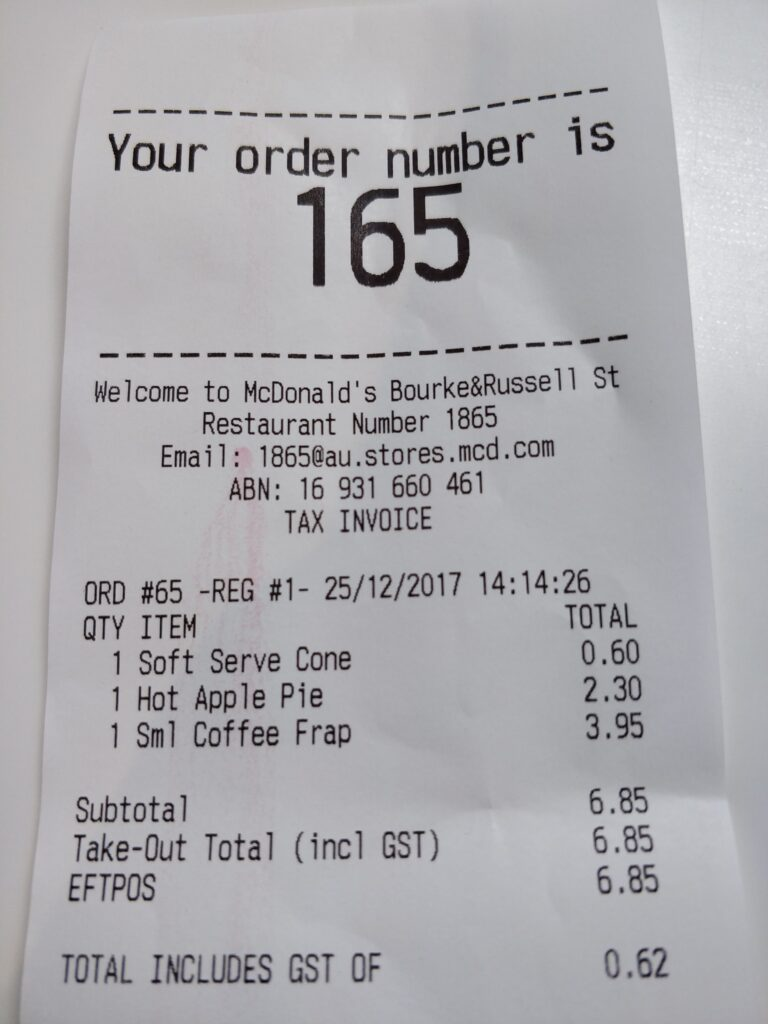

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(filename)
img = cv2.imread(filename)
cv2_imshow(img)

In [ ]:
result = reader.readtext(img, detail = 0, paragraph = True)
result

["number is Your order 165 F Fn Welcome to McDonaId' s BourkexRusse] 1 St Restaurant  Number  1865 Emai ] 1865@au.stores.mcd . cOM ABN: 16 931 660 461 Tax INVOICE",
 'ORD #65 ~REG #1 - 25/12/2017 14:14:26 QTY ITEM TOTAL Soft Serve Cone 0.60 Hot Apple Pie 2,30 Sm] Coffee Frap 3,95',
 'Subtotal Take-Out  Total (inc] GST) EFTPOS',
 '6,85 6,85 6,85',
 'totaL INCLUDES GST OF',
 '0.62']

Лучше не группировать...

In [ ]:
result = reader.readtext(img, detail = 0, paragraph = False)
result

['Your orderimunber',
 'is',
 '165',
 "We Icome to_McDonald's",
 'BBourkeRRusse] 1 St',
 'Restaurant',
 'Number',
 'Tabs',
 'Emaj]',
 '[i865@au stores micd . COM',
 'ABNAIIE%1LbbU',
 '46|',
 'TAX INVUICE ',
 '@rD #65_~REGHO25/12/2017 14:14:26',
 'ITY TTEM',
 'TTOTAL',
 'Koft Serve_Cone]',
 '0.60',
 'Hot_Apple_Pie',
 '2,301',
 'Eq',
 'Coffee Frap',
 '3.95',
 '[Subtota',
 '6.85',
 'Take-Out  Tota',
 'inc] GST',
 '6.85',
 'EFTPOS',
 '6,85',
 'TotaL TNCLuDES GSTOF]',
 '6L']

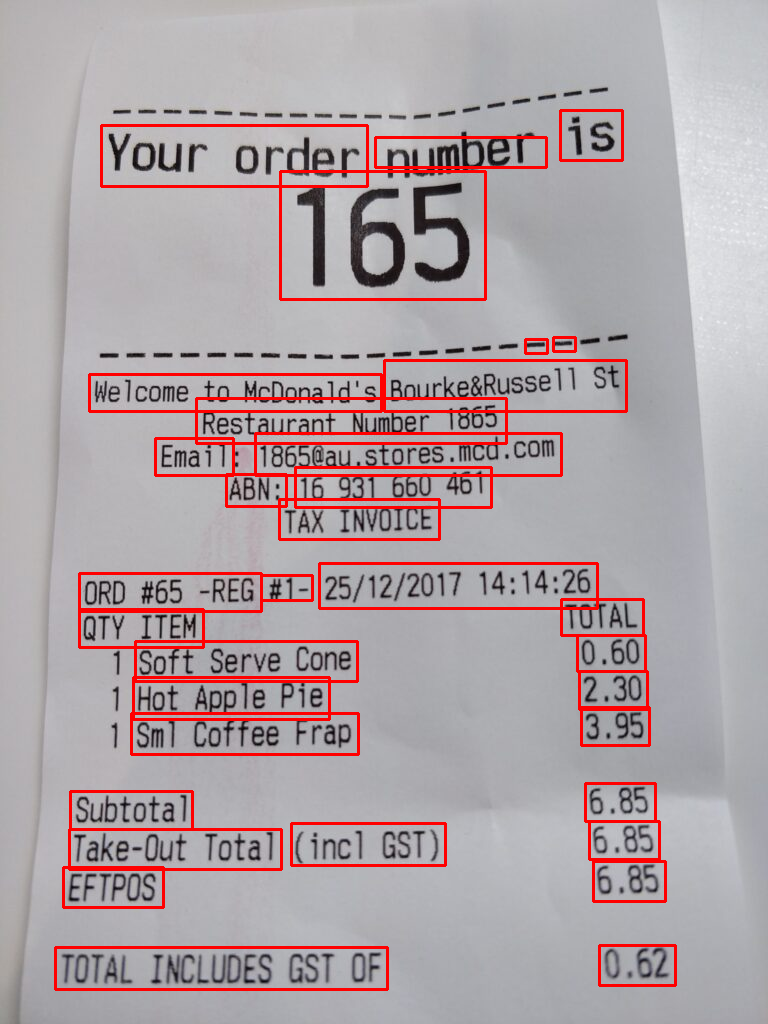

In [ ]:
result = reader.readtext(img, detail = 1, paragraph = False)
for (coord, text, prob) in result:

  (topleft, topright, bottomright, bottomleft) = coord
  tx, ty = (int(topleft[0]), int(topleft[1]))
  bx, by = (int(bottomright[0]), int(bottomright[1]))
  cv2.rectangle(img, (tx, ty), (bx, by), (0, 0, 255), 2)

cv2_imshow(img)

...

Попробуем проделать то же самое с русским

In [ ]:
reader = easyocr.Reader(['ru', 'en'])

Saving rus_eng_handwritten.jpg to rus_eng_handwritten.jpg
rus_eng_handwritten.jpg


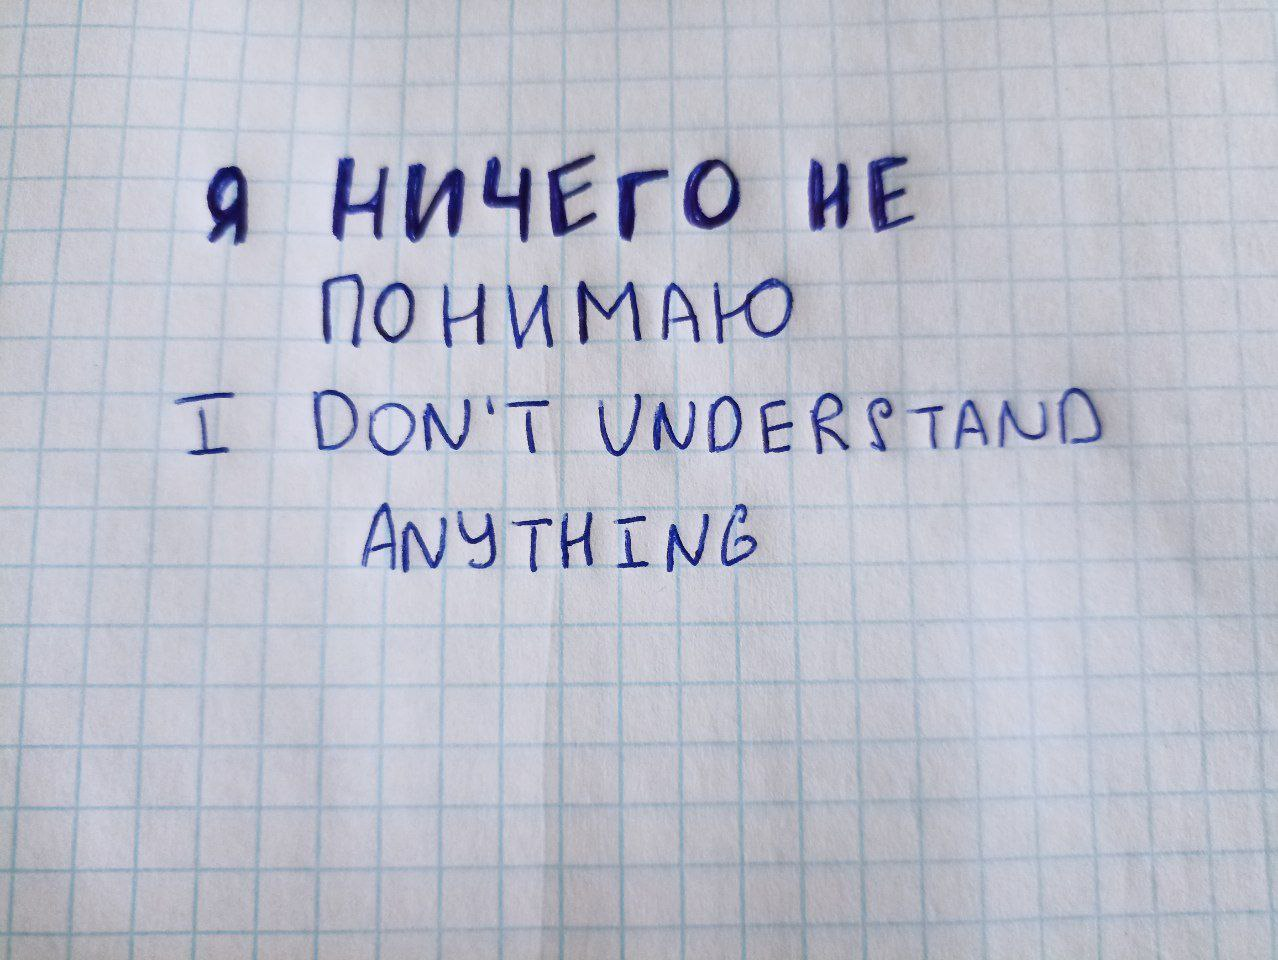

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(filename)
img = cv2.imread(filename)
cv2_imshow(img)

In [ ]:
result = reader.readtext(img, detail = 0)
result

['9', 'НиЧ€го', 'ИЕ', 'По НИМАЮ', 'I', "DoN'т", 'VvOER f тAмD', 'ANчTHi W']

Результат явно хуже, чем у Tesseract. А ещё очень долго работает...

Попробуем посмотреть на исключительно русский текст.

In [ ]:
reader = easyocr.Reader(['ru'])

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(filename)
img = cv2.imread(filename)
cv2_imshow(img)

In [ ]:
result = reader.readtext(img, detail = 0)
result

Где-то получше, где-то похуже, но мне больше нравится то, что выдал Tesseract...

Попробуем изображение из реального мира.

Saving Billboard_rus.jpg to Billboard_rus.jpg
Billboard_rus.jpg


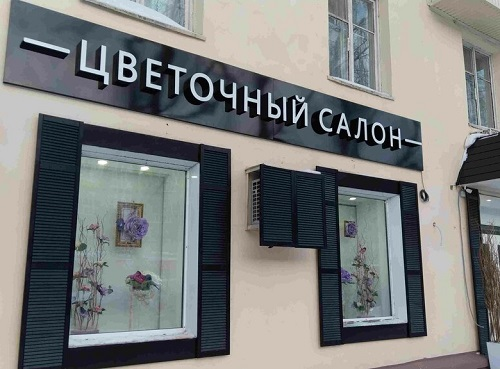

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(filename)
img = cv2.imread(filename)
cv2_imshow(img)

In [ ]:
result = reader.readtext(img, detail = 0)
result

['ЦВЕТОЧНЫЙ', 'САЛОН']

# Извлечение таблиц

In [13]:
pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 50.6 MB/s eta 0:00:00


In [36]:
import tabula
import pandas as pd
from IPython.display import display

In [53]:
dfs = tabula.read_pdf("table_eng2.pdf", pages = 'all') # создает датафрейм с табличкой
tabula.convert_into("table_eng2.pdf", "output.csv", output_format = "csv", pages = 'all') # создает файл формата .csv

Круто, что он даже не пытается извлечь текст не в таблице. Хотя для этого, конечно, у таблицы должны быть хорошо очерчены границы.

In [54]:
data = pd.read_csv('output.csv')
display(data)

Unnamed: 0      eng   eng.1            nld      deu  \
0          READINGS and Limitations  Present  Simple       Voltooid      NaN   
1                               NaN      NaN     NaN  Tegenwoordige  Perfekt   
2                               NaN  Perfect    Past            NaN      NaN   
3                               NaN      NaN     NaN           Tijd      NaN   
4                      EXPERIENTIAL        3       7              3        3   
5            Dead subjects possible        7     NaN              3        3   
6     RESULT STATE (POSSIBLE at UT)        3       3              3        3   
7          Result state cancellable        7       3              3        3   
8                       RECENT PAST        3       3              3        3   
9                        CONTINUOUS        3       7            (3)        7   
10   Narrative progression possible        7       3            (7)        3   
11  Definite time adverbial allowed        7       3              3        3   

     fra-QC     por-BR  jpn  
0     Passé  Pretérito    -  
1       NaN   Perfeito  NaN  
2   Composé        NaN   ta  
3       NaN    Simples  NaN  
4         7          7    7  
5       NaN        NaN  NaN  
6         3          3    3  
7         3          3    3  
8         3          3    3  
9         7          7    7  
10        3          3    3  
11        3          3    3

Ещё такой есть [Camelot](https://camelot-py.readthedocs.io/en/master/=), но с ним работать менее просто, хотя, кажется, он демонстрирует более хорошие результаты.

# Другие распознаватели

Есть очень крутой распознаватель **PaddleOCR**, который может определять, где написан текст, ориентацию этого текста (!) и, конечно же, может распознать сам текст во всех ориентациях, кратных 90 градусам.

К сожалению, с последним обновлением появилось много ошибок, поэтому мы не будем здесь его использовать. Хотя в интернете можно найти их исправление.

Но [тут](https://habr.com/ru/companies/jetinfosystems/articles/660405/) можно посмотреть сравнение PaddleOCR с двумя распознавателями, которые мы видели до этого.

Кроме того, **PaddleOCR** довольно тяжелый и с ним лучше работать не в тетрадке.

Базовый распознаватель можно сконструировать и самим, обучив его на [EMNIST Dataset](https://www.nist.gov/itl/products-and-services/emnist-dataset), пример можно посмотреть [тут](https://habr.com/ru/articles/466565/).

**MNIST Dataset** - это база данных, в которой хранятся образцы написания рукописных цифр. Она состоит из 70 тысяч картинок одинакового размера, где изображены написанные от руки цифры. [Здесь](https://blog.skillfactory.ru/glossary/mnist-dataset/#:~:text=MNIST%20dataset%20%E2%80%94%20%D1%8D%D1%82%D0%BE%20%D0%B1%D0%B0%D0%B7%D0%B0%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85,%D0%BD%D0%B5%D0%BC%20%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D1%8B%20%D1%83%D1%87%D0%B0%D1%82%20%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D1%82%D1%8C%20%D1%87%D0%B8%D1%81%D0%BB%D0%B0.) можно почитать о нём на русском.
**EMNIST Datset** включает в себя не только цифры, но и огромное количество рукописных букв.

Как видно, есть много всяких решений, какие-то хорошие, какие-то весьма плохие...

Есть такая [штука](https://github.com/A-s-m-a/Intelligent-Character-Recognition-ICR-), которая почему-то называется ICR (Intelligent Character Recognition), но на моём тексе не сработала. :( Но зато, как пишут авторы, эту модель можно натренировать на ваш почерк (там написано как), чтобы в дальнейшем успешно сканировать конспекты от руки. Штука. Или нет.